### Things to do

plot the volume tendency by weekday, in order to catch to wried volumn gap

1. create new volumn 'around_festival'
2. join 'volume' and 'trajectories' table
3. create new column for 'trajectoreis': 'end_time', which is 'starting_time' plus 'duration' 
4. try to shift 'end_time' a little bit to match the volume tendency even better
5. catch the correlation between 'count' and 'end_time', to see how them match 
6. try to use the links data to creat more volumns, aka, more features
7. create a new feature which combines hour and minute: 'hour_min'
8. try to split numerical weather data 
9. consider drop some outliers in 'count'

1. split wind_direction by each 15
2. split precpitation to 0, 1,  2, 3, 4, 5, 6
3. split pressure into about 20 parts (or just drop pressure)
4. split wind_speed as 0, 1, 2, 3, 4, 5, 5+ (max 7.5)
5. split temperature: // 2 * 2
6. split rel_humidity: // 10 * 10

## Q
! trajectories data from to be predicted time is not provided

1. How to handle numerical data: weather data, with weak correlation
2. How to handle festival data
3. How to use links
4. Use data to predict next two hours
5. Drop 'vehicle_model' and 'vehicle_type' or not
6. How to use the 'Road Network Topology'

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns', 500)

from scipy.stats import skew, skewtest
from scipy.stats import norm
from scipy import stats

In [2]:
links = pd.read_csv('training/links (table 3).csv')
routes = pd.read_csv('training/routes (table 4).csv')
trajectories = pd.read_csv('training/trajectories(table 5)_training.csv')
volume = pd.read_csv('training/volume(table 6)_training.csv')
weather = pd.read_csv('training/weather (table 7)_training.csv')

submission = pd.read_csv('submission_sample_volume.csv')
test_volume = pd.read_csv('testing_phase1/volume(table 6)_test1.csv')
test_weather = pd.read_csv('testing_phase1/weather (table 7)_test1.csv')

vwgrouped = pd.read_csv('twenty_window_grouped.csv')
nfes_vwgrouped = vwgrouped[vwgrouped['is_festival'] == 0]
isfes_vwgrouped = vwgrouped[vwgrouped['is_festival'] == 1]

vwgrouped_af = pd.read_csv('vwgrouped_with_around_fes')
nfes_vwgrouped_af = vwgrouped_af[vwgrouped_af['is_around_festival'] == 0]
isfes_vwgrouped_af = vwgrouped_af[vwgrouped_af['is_around_festival'] == 1]

In [3]:
weather_features = ['pressure', 'wind_direction', 'wind_speed', 'temperature', 'rel_humidity', 'precipitation']

In [4]:
?sns.distplot

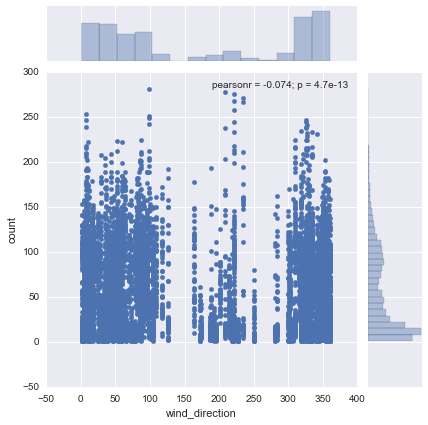

In [5]:
sns.jointplot(x="wind_direction", y="count", data=vwgrouped)

In [6]:
vwgrouped['wind_direction_cat'] = vwgrouped['wind_direction'] // 15 * 15
nfes_vwgrouped_af['wind_direction_cat'] = nfes_vwgrouped_af['wind_direction'] // 15 * 15

C:\Users\THINKPAD\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


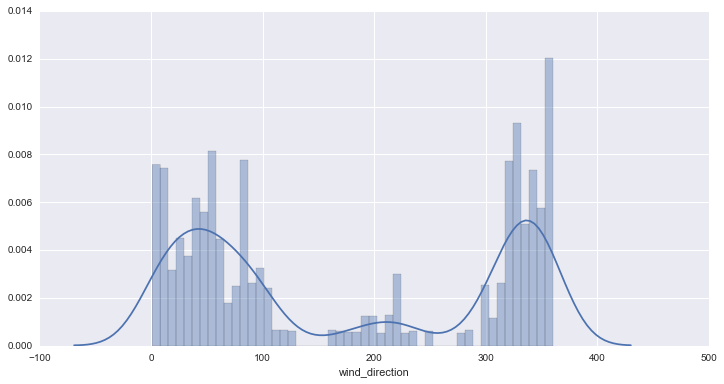

In [7]:
plt.figure(figsize = (12, 6))
sns.distplot(vwgrouped['wind_direction'], bins=50)

In [8]:
def show_cor(feature, vwgrouped=vwgrouped, nfes_vwgrouped_af=nfes_vwgrouped_af):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    print "feature is:", feature
    print "----------------------------"

    ax1.plot(vwgrouped[feature], vwgrouped['count'], '.')
    print np.corrcoef(vwgrouped[feature], vwgrouped['coufnt'])

    ax2.plot(nfes_vwgrouped_af[feature], nfes_vwgrouped_af['count'], '.')
    print np.corrcoef(nfes_vwgrouped_af[feature], nfes_vwgrouped_af['count'])
    fig.show()

In [9]:
print np.min(vwgrouped['pressure'])
print np.max(vwgrouped['pressure'])

1003.0
1018.4


In [10]:
vwgrouped['pressure'] = vwgrouped['pressure'] - 1003

In [12]:
# show_cor(weather_features[0])

In [ ]:
show_cor(weather_features[1])
show_cor('wind_direction_cat')

In [ ]:
print np.max(vwgrouped['wind_speed'])
print np.min(vwgrouped['wind_speed'])

Skew is: 1.01877629208


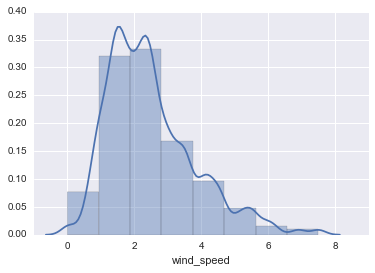

In [13]:
#histogram and normal probability plot
print "Skew is:", skew(vwgrouped['wind_speed'])
sns.distplot(vwgrouped['wind_speed'], bins=8);
fig = plt.figure()
# res = stats.probplot(vwgrouped['wind_speed'], plot=plt)

Skew is: 0.00829951293328


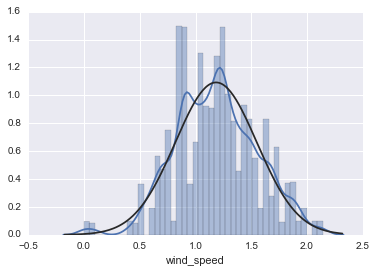

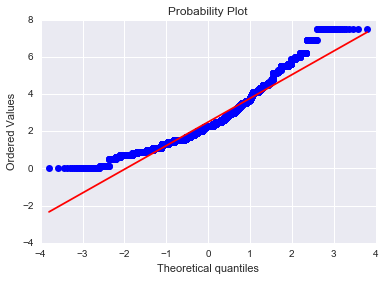

In [14]:
#histogram and normal probability plot
print "Skew is:", skew(np.log1p(vwgrouped['wind_speed']))
sns.distplot(np.log1p(vwgrouped['wind_speed']), fit=norm);
fig = plt.figure()
res = stats.probplot(vwgrouped['wind_speed'], plot=plt)

In [15]:
print np.corrcoef(vwgrouped['count'], np.log1p(vwgrouped['wind_speed']))
print np.corrcoef(vwgrouped['count'], vwgrouped['wind_speed'])

[[ 1.          0.06568837]
 [ 0.06568837  1.        ]]
[[ 1.          0.07445451]
 [ 0.07445451  1.        ]]


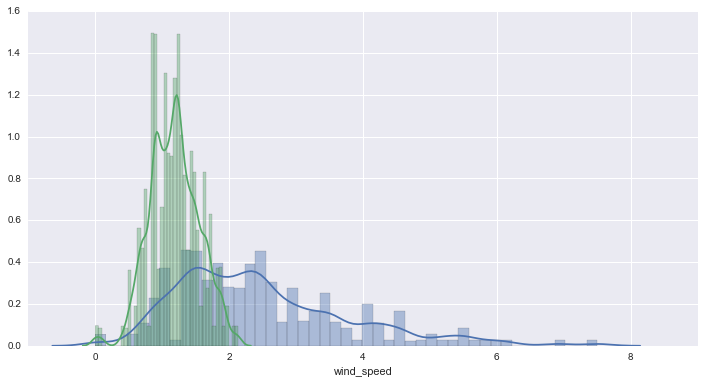

In [16]:
plt.figure(figsize = (12, 6))
sns.distplot(vwgrouped['wind_speed'])
sns.distplot(np.log1p(vwgrouped['wind_speed']))

feature is: wind_speed
----------------------------


KeyError: 'coufnt'

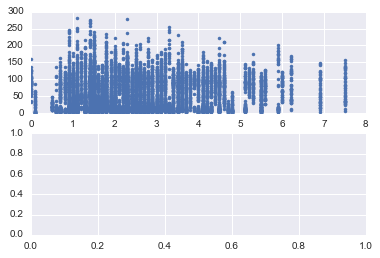

In [17]:
show_cor(weather_features[2])

In [ ]:
sns.distplot(vwgrouped['temperature'], bins = 20)

In [18]:
vwgrouped['temperature_cat'] = vwgrouped['temperature'] // 2 * 2
nfes_vwgrouped_af['temperature_cat'] = nfes_vwgrouped['temperature'] // 2 * 2

C:\Users\THINKPAD\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
vwgrouped.head()

,window_time,tollgate_id,direction,vehicle_model,has_etc,vehicle_type,month,day,hour,minute,hour_y,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,count,direction.1,tollgate_id.1,window_time.1,weekday,rounded_min,is_rounded_min_0.0,is_rounded_min_20.0,is_rounded_min_40.0,is_hour_0.0,is_hour_1.0,is_hour_2.0,is_hour_3.0,is_hour_4.0,is_hour_5.0,is_hour_6.0,is_hour_7.0,is_hour_8.0,is_hour_9.0,is_hour_10.0,is_hour_11.0,is_hour_12.0,is_hour_13.0,is_hour_14.0,is_hour_15.0,is_hour_16.0,is_hour_17.0,is_hour_18.0,is_hour_19.0,is_hour_20.0,is_hour_21.0,is_hour_22.0,is_hour_23.0,is_tollgate_id_1,is_tollgate_id_2,is_tollgate_id_3,is_direction_0,is_direction_1,is_weekday_0.0,is_weekday_1.0,is_weekday_2.0,is_weekday_3.0,is_weekday_4.0,is_weekday_5.0,is_weekday_6.0,is_festival,is_working_day,norm_pressure,norm_sea_pressure,norm_wind_direction,norm_wind_speed,norm_temperature,norm_rel_humidity,norm_precipitation,time_window_formatted,wind_direction_cat,temperature_cat
0,2016-09-19-0-0,1,0,1.692308,0.307692,NaN,9.0,19.0,0.0,11.923077,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,13,0,1,2016-09-19-0-0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.0,2016-09-19 00:00:00,315.0,22.0
1,2016-09-19-0-0,1,1,1.292857,0.235714,0.221429,9.0,19.0,0.0,9.285714,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,140,1,1,2016-09-19-0-0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.0,2016-09-19 00:00:00,315.0,22.0
2,2016-09-19-0-0,2,0,1.500000,0.000000,NaN,9.0,19.0,0.0,3.500000,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,2,0,2,2016-09-19-0-0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.0,2016-09-19 00:00:00,315.0,22.0
3,2016-09-19-0-0,3,0,2.294118,0.000000,NaN,9.0,19.0,0.0,11.823529,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,17,0,3,2016-09-19-0-0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.0,2016-09-19 00:00:00,315.0,22.0
4,2016-09-19-0-0,3,1,1.270718,0.254144,0.116022,9.0,19.0,0.0,9.011050,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,181,1,3,2016-09-19-0-0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.0,2016-09-19 00:00:00,315.0,22.0


feature is: temperature_cat
----------------------------


KeyError: 'coufnt'

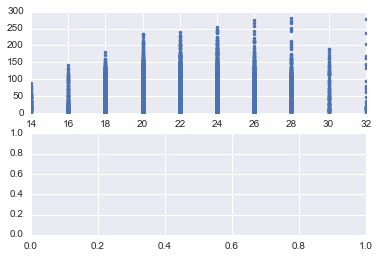

In [20]:
show_cor('temperature_cat')

In [ ]:
show_cor(weather_features[3])

In [ ]:
print np.corrcoef(vwgrouped['temperature_cat'], vwgrouped['count'])
print np.corrcoef(nfes_vwgrouped_af['temperature_cat'], nfes_vwgrouped_af['count'])

feature is: temperature
----------------------------


KeyError: 'coufnt'

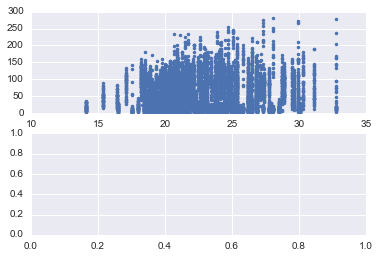

In [21]:
show_cor(weather_features[3])

In [ ]:
np.corrcoef(vwgrouped['rel_humidity'], vwgrouped['precipitation'])

In [22]:
vwgrouped['rel_humidity_cat'] = vwgrouped['rel_humidity'] // 10 * 10
nfes_vwgrouped_af['rel_humidity_cat'] = nfes_vwgrouped_af['rel_humidity'] // 10 * 10

C:\Users\THINKPAD\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


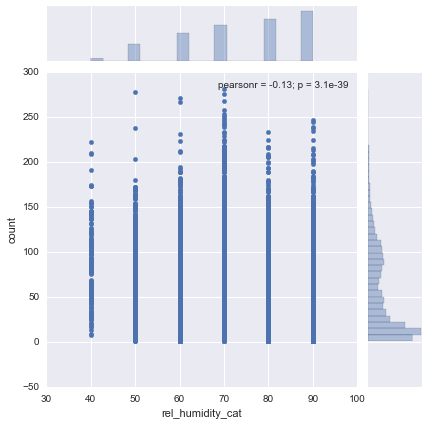

In [23]:
sns.jointplot(vwgrouped['rel_humidity_cat'], vwgrouped['count'])

In [24]:
print np.corrcoef(vwgrouped['rel_humidity_cat'], vwgrouped['count'])
print np.corrcoef(nfes_vwgrouped_af['rel_humidity_cat'], nfes_vwgrouped_af['count'])

[[ 1.         -0.13297375]
 [-0.13297375  1.        ]]
[[ 1.         -0.14912149]
 [-0.14912149  1.        ]]


feature is: rel_humidity
----------------------------


KeyError: 'coufnt'

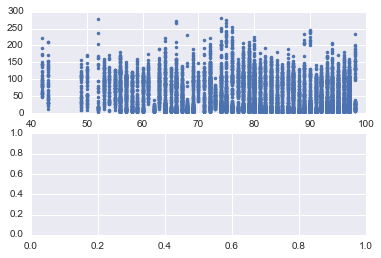

In [25]:
show_cor(weather_features[4])

In [ ]:
len(vwgrouped[vwgrouped['precipitation'] >2])

In [ ]:
len(vwgrouped)

In [ ]:
vwgrouped['rained'] = np.array([0] * len(vwgrouped))

vwgrouped.loc[vwgrouped['precipitation']>0, 'rained'] = 1

In [ ]:
vwgrouped['heavy_rain'] = np.array([0] * len(vwgrouped))
vwgrouped.loc[vwgrouped['precipitation']>1, 'heavy_rain'] = 1

In [26]:
sns.boxplot(x='heavy_rain', y='count', data=vwgrouped)

ValueError: Could not interpret input 'heavy_rain'

In [27]:
rained = vwgrouped[vwgrouped['precipitation']>0]

In [28]:
np.corrcoef(rained['precipitation'], rained['count'])

array([[ 1.        ,  0.13307733],
       [ 0.13307733,  1.        ]])

In [29]:
vwgrouped

,window_time,tollgate_id,direction,vehicle_model,has_etc,vehicle_type,month,day,hour,minute,hour_y,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,count,direction.1,tollgate_id.1,window_time.1,weekday,rounded_min,is_rounded_min_0.0,is_rounded_min_20.0,is_rounded_min_40.0,is_hour_0.0,is_hour_1.0,is_hour_2.0,is_hour_3.0,is_hour_4.0,is_hour_5.0,is_hour_6.0,is_hour_7.0,is_hour_8.0,is_hour_9.0,is_hour_10.0,is_hour_11.0,is_hour_12.0,is_hour_13.0,is_hour_14.0,is_hour_15.0,is_hour_16.0,is_hour_17.0,is_hour_18.0,is_hour_19.0,is_hour_20.0,is_hour_21.0,is_hour_22.0,is_hour_23.0,is_tollgate_id_1,is_tollgate_id_2,is_tollgate_id_3,is_direction_0,is_direction_1,is_weekday_0.0,is_weekday_1.0,is_weekday_2.0,is_weekday_3.0,is_weekday_4.0,is_weekday_5.0,is_weekday_6.0,is_festival,is_working_day,norm_pressure,norm_sea_pressure,norm_wind_direction,norm_wind_speed,norm_temperature,norm_rel_humidity,norm_precipitation,time_window_formatted,wind_direction_cat,temperature_cat,rel_humidity_cat
0,2016-09-19-0-0,1,0,1.692308,0.307692,NaN,9.0,19.0,0.0,11.923077,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,13,0,1,2016-09-19-0-0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.000000,2016-09-19 00:00:00,315.0,22.0,70.0
1,2016-09-19-0-0,1,1,1.292857,0.235714,0.221429,9.0,19.0,0.0,9.285714,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,140,1,1,2016-09-19-0-0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.000000,2016-09-19 00:00:00,315.0,22.0,70.0
2,2016-09-19-0-0,2,0,1.500000,0.000000,NaN,9.0,19.0,0.0,3.500000,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,2,0,2,2016-09-19-0-0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.000000,2016-09-19 00:00:00,315.0,22.0,70.0
3,2016-09-19-0-0,3,0,2.294118,0.000000,NaN,9.0,19.0,0.0,11.823529,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,17,0,3,2016-09-19-0-0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.000000,2016-09-19 00:00:00,315.0,22.0,70.0
4,2016-09-19-0-0,3,1,1.270718,0.254144,0.116022,9.0,19.0,0.0,9.011050,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,181,1,3,2016-09-19-0-0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.000000,2016-09-19 00:00:00,315.0,22.0,70.0
5,2016-09-19-0-20,1,0,1.000000,0.166667,NaN,9.0,19.0,0.0,29.833333,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,6,0,1,2016-09-19-0-20,1.0,20.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.000000,2016-09-19 00:00:20,315.0,22.0,70.0
6,2016-09-19-0-20,1,1,1.732143,0.178571,0.285714,9.0,19.0,0.0,28.250000,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,56,1,1,2016-09-19-0-20,1.0,20.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.000000,2016-09-19 00:00:20,315.0,22.0,70.0
7,2016-09-19-0-20,3,0,1.187500,0.062500,NaN,9.0,19.0,0.0,31.937500,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,16,0,3,2016-09-19-0-20,1.0,20.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.000000,2016-09-19 00:00:20,315.0,22.0,70.0
8,2016-09-19-0-20,3,1,1.321429,0.312500,0.142857,9.0,19.0,0.0,29.276786,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.0,112,1,3,2016-09-19-0-20,1.0,20.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0.337662,0.339744,0.913649,0.373333,0.433155,0.607143,0.000000,2016-09-19 00:00:20,315.0,22.0,70.0
9,2016-09-19-0-40,1,0,1.888889,0.111111,NaN,9.0,19.0,0.0,49.000000,0.0,5.2,1013.2,329.0,2.8,22.2,76.0,0.

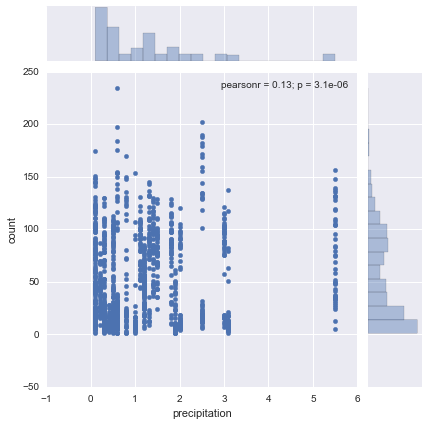

In [30]:
sns.jointplot(x='precipitation', y='count', data=rained)

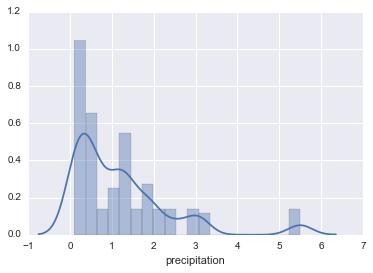

In [31]:
sns.distplot(vwgrouped[vwgrouped['precipitation']>0]['precipitation'])

feature is: precipitation
----------------------------


KeyError: 'coufnt'

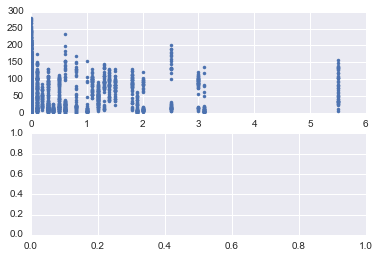

In [32]:
show_cor(weather_features[5])

In [ ]:
vwgrouped.head()

In [ ]:
# Boxplot of coutns: festival and not_festival days 

sns.boxplot(x='weekday', y='count', hue = 'is_festival', data=vwgrouped)

In [ ]:
sns.boxplot(x = 'weekday', y = 'count', hue = 'is_working_day', data= nfes_vwgrouped)

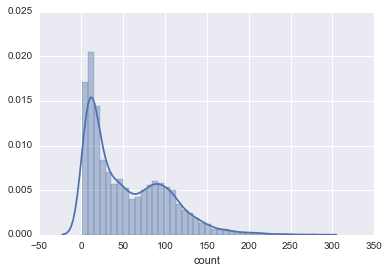

In [33]:
sns.distplot(vwgrouped['count'])

In [34]:
?sns.distplot

In [35]:
?plt.hist

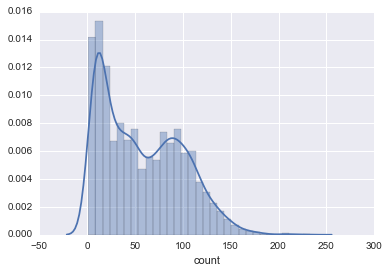

In [36]:
sns.distplot(nfes_vwgrouped['count'])

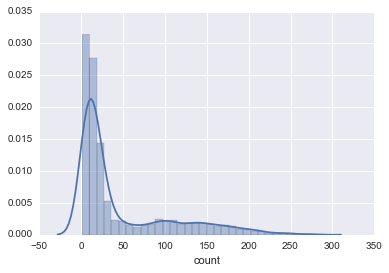

In [37]:
sns.distplot(isfes_vwgrouped['count'])

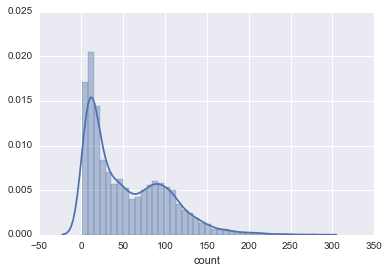

In [38]:
sns.distplot(vwgrouped_af['count'])

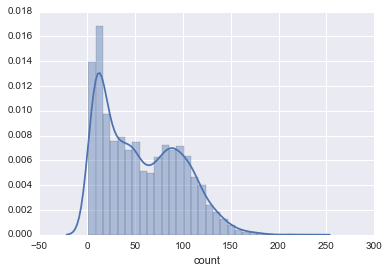

In [39]:
sns.distplot(nfes_vwgrouped_af['count'])

In [40]:
?sns.distplot

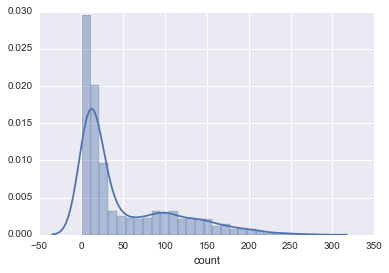

In [41]:
sns.distplot(isfes_vwgrouped_af['count'])

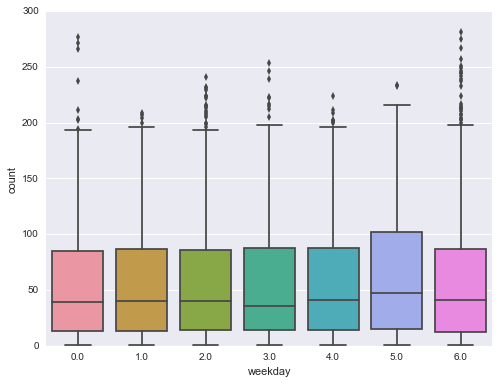

In [42]:
#box plot overallqual/saleprice
var = 'weekday'
data = pd.concat([vwgrouped['count'], vwgrouped[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="count", data=data)

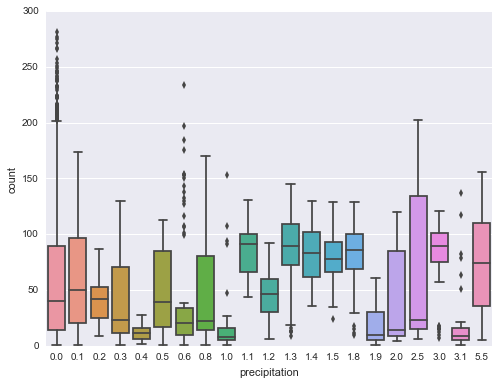

In [43]:
#box plot overallqual/saleprice
var = 'precipitation'
data = pd.concat([vwgrouped['count'], vwgrouped[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="count", data=data)

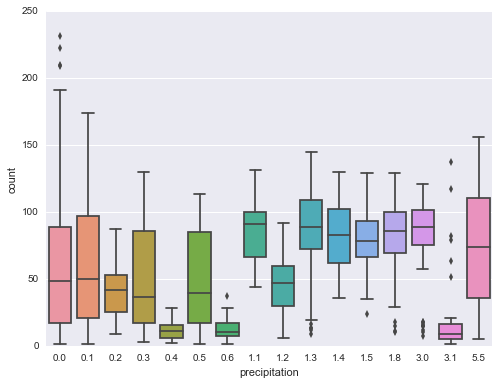

In [44]:
#box plot overallqual/saleprice
var = 'precipitation'
data = pd.concat([nfes_vwgrouped_af['count'], nfes_vwgrouped_af[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="count", data=data)

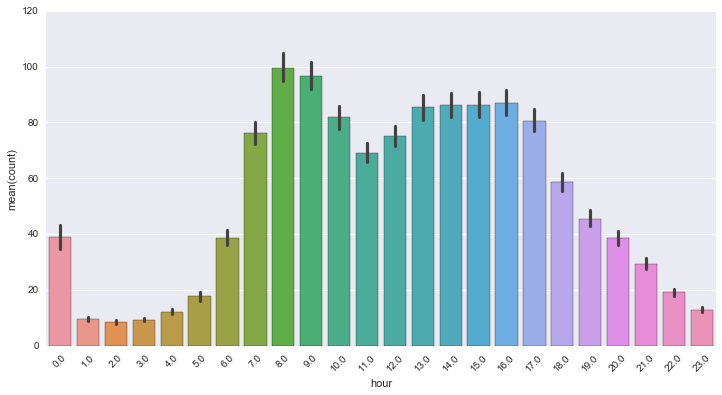

In [45]:
plt.figure(figsize = (12, 6))
sns.barplot('hour', 'count', data=vwgrouped)
xt = plt.xticks(rotation=45)

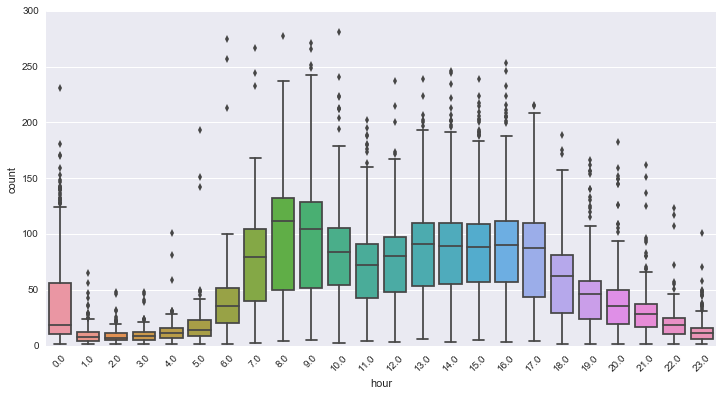

In [46]:
plt.figure(figsize = (12, 6))
sns.boxplot('hour', 'count', data=vwgrouped)
xt = plt.xticks(rotation=45)

In [47]:
print("Skewness of the original intended feature:",skew(vwgrouped['count']))
print("Skewness of transformed feature", skew(np.log1p(vwgrouped['count'])))

('Skewness of the original intended feature:', 0.9542165005983123)
('Skewness of transformed feature', -0.494876556219917)
